
Goals :
1. Implementing a linear Regression Model.
2. Defining and testing various loss functions within the Python framework.
3. Experimenting with minimizing loss through gradient Descent.
4. In the end use the set Model to predict Final grades.


## Initialize

In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")
%matplotlib inline

### Load Data: Using sample set of CS 205 grades

In [1]:
import pandas as pd
df = pd.read_csv("data/CS205_grades_12_19_18_Final.csv")
df_cleaned = df[['midtermRaw','finalRaw']]
# drop all undefined rows 
df_cleaned = df_cleaned.dropna() 
df_cleaned.head()

,midtermRaw,finalRaw
3,45.5,62.0
4,58.0,60.5
5,68.0,32.0
6,64.5,50.5
7,74.0,51.0


### Normalize data using the MinMaxScaler. Giving each Midterm and Final score a value between 0 and 1


In [3]:
from sklearn.preprocessing import MinMaxScaler

x = df_cleaned.dropna().iloc[:,[0]]
y = df_cleaned.dropna().iloc[:,[1]]

scaler = MinMaxScaler()

X_scaled_values = scaler.fit_transform(x)
X_scaled_values[:,:] = X_scaled_values
Y_scaled_values = scaler.fit_transform(y)
Y_scaled_values[:,:] = Y_scaled_values

x = X_scaled_values
y = Y_scaled_values

### Plot the Data to see if Linear Regression would be a good fit

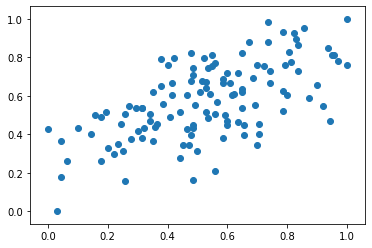

In [4]:
import numpy as np
import matplotlib.pyplot as plt



plt.scatter(x,y)


## From this we can see that Linear Regression would be a good fit due to the fit of the scatterplot.

# How to create a manual Linear Regression Line
## First Define a basic function intended to return the product of theta0,theta1, and x

In [208]:
# define the function h(theta)
def h(theta0, theta1, x):
    return theta0 + theta1*x

### Manually Define a square loss(L2) Function

In [209]:
import numpy as np

def sqerror(x, y, theta0, theta1):
    return np.mean((y-h(theta0,theta1,x))*(y-h(theta0,theta1,x)))
    
sqerror(x, y, 0.29,0.52)

0.023489423483239062

### Defining the L1 absolute error function

In [210]:
import numpy as np
import math

def abserror(x, y, theta0, theta1):

    output = np.mean(abs(y-h(theta0,theta1,x)))
    return output

abserror(x, y, 0.29,0.52)

0.1258878083450344

### Define a function called huberror that computes the pseudo huber error based off of the 2 arguments provided:
The equation for this function is given by 
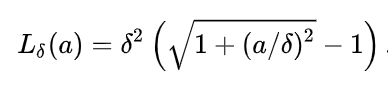
The following function finds the average huber error.

In [211]:
import numpy as np
import math

def huberror(x, y, theta0, theta1, delta):

    a = ((y - h(theta0, theta1,x))/delta)**2
    b = np.sqrt(1 + a) - 1
    sqard = delta**2
    return np.mean(sqard * b)
    

huberror(x, y, 0.29,0.52,0.1)

0.006994227909507368

### In the spirit of trying to understand the impact higher or lower theta's have on the ouput, I created an slider to show the difference. Try it out for yourself!

In [9]:
from ipywidgets import interact
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [10]:

import pylab
import numpy

def f(theta0, theta1):
  

    y1 = h(theta0, theta1, x) 
    pylab.plot(x,y1) 
    
    sqerr = round(sqerror(x, y, theta0, theta1),6)
    abserr = round(abserror(x, y, theta0, theta1),4)
    huberr = round(huberror(x, y, theta0, theta1, 0.01),4)
    pylab.title('L1=' + str(abserr) + '  L2=' + str(sqerr) + '  hub=' + str(huberr))
    
    pylab.scatter(x, y, alpha=0.5)
    pylab.show() 

interact(f, theta1=(0,1,0.1), theta0=(0,1,0.1));


interactive(children=(FloatSlider(value=0.0, description='theta0', max=1.0), FloatSlider(value=0.0, descriptio…

### What are the "best" values for each error function?

In [11]:


# BEST VALUES FOR AVE SQUARE ERROR
theta0 = .10
theta1 = .80
error = .0014
# BEST VALUES FOR AVE ABS ERROR
theta0 = .10
theta1 = 1.00
error = .0015

# BEST VALUES FOR AVE HUBER ERROR
theta0 = .10
theta1 = 1.00
error = .0015

# Gradient Descent Exploration
In this task we use the Gradient descent methods to find a "better" values for theta0 and theta1 that minimizes the error. Gradient descent is an iterative algorithm. It computes values of theta0 and theta1 in the direction of reaching the minimum point in the error function. The iterative formulas using L2 loss function for theta0 and theta1 are given by:
$$
\theta_0 = \theta_0 - \alpha*(\sum(\theta_1*x_j + \theta_0)-y_j)
$$
$$
\theta_1 = \theta_1 - \alpha*(\sum(\theta_1*x_j + \theta_0 - y_j)*x_j
$$


### Compute using Gradient Descent algorithm (L2 loss)

Given the observed data (obsX,obsY), learning rate (alpha), and desired error threshold, 
The function returns theta0 and theta1 when it reaches the error threshold.
The convergence is reached when the abs(newError - oldError) is less than the threshold.

In [228]:
  def gd2(obsX, obsY, alpha, threshold):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1 from Gradient Descent L2 loss algorithm
    Return: Iterations and L2 Error
    """
    track = 0
    t0 = 0
    t1 = 0
    
    Ylen = len(obsY)
    Xlen = len(obsX)
    
    Pt0 = 0
    Pt0 = 0
   
    x1 =((obsX * t1) + t0)
    minus1 = x1 - obsY
    
    t0 = t0 - alpha * sum(minus1)/Ylen
    t1 = t1 - alpha * sum(minus1 * obsX) /Xlen
    track = 1
    PE = sqerror(obsX,obsY,theta0,theta1)
    constant = 1
    NE = PE + threshold + constant
    
    
    while(abs(NE - PE) > threshold):
        x1 = obsX * t1 + t0
        minus1 = x1 - obsY
        
        t0 = t0 - alpha * sum(minus1)/Ylen
        t1 = t1 - alpha * sum(minus1 * obsX) /Xlen
        track += 1
        PE = NE
        NE = np.mean((obsX * t1 + t0 - obsY) ** 2) /Ylen

        print(t0,t1,NE)
    return t0, t1, NE, track
    
    
    
    

[theta0,theta1,newError,iterations] = gd2(x,y,0.01,0.000001)
print(iterations)

[0.01139455] [0.0066027] 0.0028462579756407856
[0.0169804] [0.00984237] 0.0027788956936028405
[0.02249325] [0.01304162] 0.002713262778008837
[0.02793403] [0.01620098] 0.0026493148136392565
[0.03330368] [0.01932097] 0.0025870085260032453
[0.03860313] [0.02240209] 0.002526301752040954
[0.04383327] [0.02544484] 0.00246715341157832
[0.04899501] [0.02844972] 0.002409523479514994
[0.05408922] [0.03141722] 0.0023533729587265737
[0.05911679] [0.03434782] 0.0022986638536627935
[0.06407857] [0.037242] 0.0022453591446237996
[0.06897542] [0.04010022] 0.0021934227626970973
[0.07380816] [0.04292295] 0.0021428195653382036
[0.07857765] [0.04571065] 0.0020935153125784547
[0.08328468] [0.04846378] 0.002045476643843895
[0.08793007] [0.05118277] 0.001998671055369519
[0.09251462] [0.05386807] 0.0019530668781935951
[0.0970391] [0.05652011] 0.0019086332567171693
[0.10150431] [0.05913932] 0.001865340127814227
[0.105911] [0.06172613] 0.0018231582004783803
[0.11025994] [0.06428095] 0.0017820589359922871
[0.1145

In [229]:
theta0, theta1


(array([0.38656094]), array([0.2381108]))

### Compute Gradient Descent (Huber)
Compute a formula for Pseudo huber gradient descent using derivative methods. Similar to L2 descent, use the new formulas (obtained from pseudo huber derivatives) to compute values of theta1, theta1, error. The pseudo huber loss function is provided in Part 2.3. Use that to differentiate the huber function to theta0 and theta1. 

Print out theta0 and theta1 for each iteration.

In [243]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error, 
# the function returns theta0, theta1, error and iterations
# that reaches a minimum error threshold



def gdh(obsX, obsY, alpha, threshold, delta):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1 from Gradient Descent huber loss algorithm
    Return: Iterations and huber Error
    """
    count = 1
    PT0 = 0
    PT1 = 0
    
    TC = PT0 - alpha*(np.sum(PT1*obsX+PT0)-obsY)
    TP = PT1 - alpha*(np.sum(PT1*obsX+PT0-obsY)*obsX)
    
    PR = huberror(obsX,obsY,TC,TP,delta)
    #First print
    print(PR, threshold)
    PT0 = TC
    PT1 = TP
    count+=1
    
    TC = PT0 - alpha*(np.sum(PT1*obsX+PT0)-obsY)
    TP = PT1 - alpha*(np.sum(PT1*obsX+PT0-obsY)*obsX)
    
    NR =huberror(obsX,obsY,TC, TP,delta)
    #Second Print
    print(NR, PR, threshold)
    while(abs(NR-PR) > threshold):
        
        PR = NR
        PT0 = TC
        PT1 = TP
        count +=1
        #Last print
        print(NR, PR, PR)
    return [TC,TP,NR,count]
    print(TC, TP, NR)

# testing    
[theta0,theta1,newError,iterations] = gdh(x,y,0.01,0.000001,0.01)
print(iterations)

0.003258873696563515 1e-06
0.004837509915910264 0.003258873696563515 1e-06
0.004837509915910264 0.004837509915910264 0.004837509915910264
3


###  What values provided the min value through gradient descent?
1. The values of theta0, theta1, alpha, error that provided the minimum value through gradient descent:
    Theta0: .004837509915910264, Theta1: 0.004837509915910264, and alpha: 0.004837509915910264




### Compare with Library Estimators
Using the sklearn LinearRegression module to automate this process find the differences in intercept value.

In [230]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
result = lm.fit(x,y)
print(result.intercept_)
print(result.coef_)

[0.29620134]
[[0.5238794]]


In [231]:
theta0 = result.intercept_
theta1 = result.coef_
sqerror(x, y, theta0,theta1)

0.02342046127015977

## Predict the Final Exam Score
The regression line was obtained using grades from CS 205 course. We can consider them to be training data. Now we trained a model (with theta0 and theta1) so we can predict the grade for your own course based on your midterm grade.
We will do few things before we can accomplish this task.

### Read the supplied data into the project

In [125]:
import pandas as pd
df_439 = pd.read_csv("data/CS439_grades_03_15_19.csv")
df_439.info()
mid = df_439[df_439['midterm']<80]
mid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 1 columns):
midterm    97 non-null float64
dtypes: float64(1)
memory usage: 856.0 bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 96
Data columns (total 1 columns):
midterm    96 non-null float64
dtypes: float64(1)
memory usage: 1.5 KB


### Predict the Grade
By scaling the values in the midterm grades of CS 439 and compute the estimated final exam grade. 

In [196]:
from sklearn import preprocessing


sep = 'midterm'
extend =  preprocessing.MinMaxScaler(feature_range=(29.8,82))


ms = Full_List.fit_transform(mid[[sep]])


fs = extend.fit_transform(ms)
ms= np.round(ms,1)
ms= ms.tolist()

ms=[x[0] 
      for x in ms]
#fs=[x[0]
      # for x in fs]
    
fs = np.round(fs,1)
Flen = len(final_score)

for x in range(0,Flen):
    print(ms[x], fs[[x]])
    


61.5 [[61.9]]
42.3 [[51.9]]
52.6 [[57.2]]
12.8 [[36.5]]
94.9 [[79.3]]
56.4 [[59.2]]
39.7 [[50.5]]
46.2 [[53.9]]
43.6 [[52.6]]
21.8 [[41.2]]
48.7 [[55.2]]
43.6 [[52.6]]
75.6 [[69.3]]
65.4 [[63.9]]
52.6 [[57.2]]
43.6 [[52.6]]
61.5 [[61.9]]
42.3 [[51.9]]
60.3 [[61.3]]
100.0 [[82.]]
70.5 [[66.6]]
61.5 [[61.9]]
0.0 [[29.8]]
53.8 [[57.9]]
34.6 [[47.9]]
83.3 [[73.3]]
67.9 [[65.3]]
91.0 [[77.3]]
29.5 [[45.2]]
73.1 [[67.9]]
67.9 [[65.3]]
2.6 [[31.1]]
61.5 [[61.9]]
69.2 [[65.9]]
48.7 [[55.2]]
98.7 [[81.3]]
34.6 [[47.9]]
60.3 [[61.3]]
44.9 [[53.2]]
50.0 [[55.9]]
69.2 [[65.9]]
60.3 [[61.3]]
83.3 [[73.3]]
26.9 [[43.9]]
61.5 [[61.9]]
20.5 [[40.5]]
19.2 [[39.8]]
6.4 [[33.1]]
80.8 [[72.]]
44.9 [[53.2]]
26.9 [[43.9]]
14.1 [[37.2]]
67.9 [[65.3]]
51.3 [[56.6]]
24.4 [[42.5]]
78.2 [[70.6]]
23.1 [[41.8]]
60.3 [[61.3]]
71.8 [[67.3]]
85.9 [[74.6]]
50.0 [[55.9]]
37.2 [[49.2]]
73.1 [[67.9]]
62.8 [[62.6]]
59.0 [[60.6]]
70.5 [[66.6]]
5.1 [[32.5]]
34.6 [[47.9]]
19.2 [[39.8]]
50.0 [[55.9]]
67.9 [[65.3]]
7.7 [[33.8]